<a href="https://colab.research.google.com/github/XinGuu/evals_tmp/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/XinGuu/evals_tmp.git

Cloning into 'evals_tmp'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 23 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 1.37 MiB | 12.61 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
evals_fdir = "evals_tmp"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools

# Pretrain

In [ ]:
pretrain = False
fname = 'pretrain' if pretrain else 'normal'
outfig_fname = f"evals-{fname}_over_train.pdf"

outfig_dir = "figs"
os.makedirs(outfig_dir, exist_ok=True)
outfig_path = os.path.join(outfig_dir, outfig_fname)

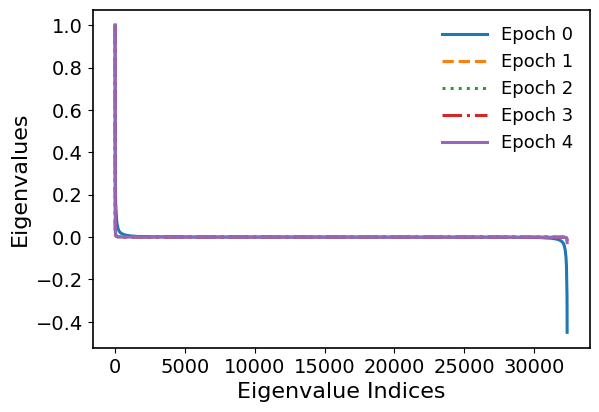

In [ ]:
evals_over_train = []

for epoch in range(5):
    evals_fname = f"evals_{fname}_epoch{epoch}.npy"
    eigenvalues = np.load(os.path.join(evals_fdir, evals_fname))
    evals_over_train.append(eigenvalues)

plt.rcParams.update({
        "font.size": 14,  # base font size
        "axes.labelsize": 16,  # x/y label size
        "axes.titlesize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 13,
        "lines.linewidth": 2.2,  # make curves thicker
        "axes.linewidth": 1.2,  # thicker axis lines
    })

plt.figure(figsize=(6, 4))
line_styles = ['-', '--', ':', '-.']
line_cycler = itertools.cycle(line_styles)

for i in range(len(evals_over_train)):
    style = next(line_cycler)
    plt.plot(evals_over_train[i], label=f"Epoch {i}", linestyle=style)

plt.xlabel("Eigenvalue Indices")
plt.ylabel("Eigenvalues")

# --- legend styling ---
plt.legend(frameon=False, loc="best", handlelength=2.5)


plt.tight_layout(pad=0.2)
plt.savefig(outfig_path, format="pdf", bbox_inches="tight")

plt.show()

# Public Data

In [ ]:
# model = 'tinycnnflex'
model = 'tinycnnpool'

outfig_fname = f"evals-pub_{model}.pdf"

outfig_dir = "figs"
os.makedirs(outfig_dir, exist_ok=True)
outfig_path = os.path.join(outfig_dir, outfig_fname)

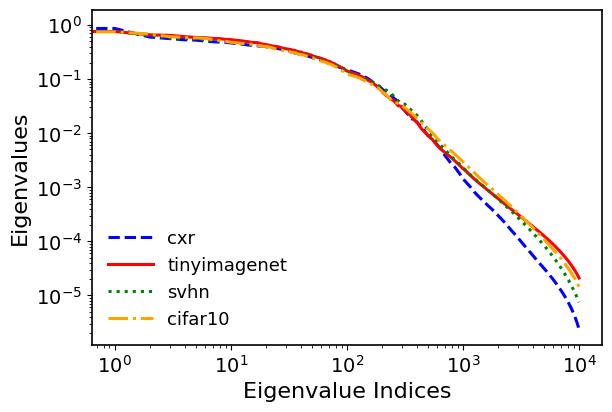

In [ ]:
dataset1 = 'cxr'
evals1 = np.load(os.path.join(evals_fdir, f"evals_{model}_{dataset1}.npy"))
dataset2 = 'tinyimagenet'
evals2 = np.load(os.path.join(evals_fdir, f"evals_{model}_{dataset2}.npy"))
dataset3 = 'svhn'
evals3 = np.load(os.path.join(evals_fdir, f"evals_{model}_{dataset3}.npy"))
dataset4 = 'cifar10'
evals4 = np.load(os.path.join(evals_fdir, f"evals_{model}_{dataset4}.npy"))

plt.rcParams.update({
        "font.size": 14,  # base font size
        "axes.labelsize": 16,  # x/y label size
        "axes.titlesize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 13,
        "lines.linewidth": 2.2,  # make curves thicker
        "axes.linewidth": 1.2,  # thicker axis lines
    })

plt.figure(figsize=(6, 4))

plt.plot(evals1, label=dataset1, color="blue", linestyle="--")
plt.plot(evals2, label=dataset2, color="red", linestyle="-")
plt.plot(evals3, label=dataset3, color="green", linestyle=":")
plt.plot(evals4, label=dataset4, color="orange", linestyle="-.")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Eigenvalue Indices")
plt.ylabel("Eigenvalues")

# --- legend styling ---
plt.legend(frameon=False, loc="best", handlelength=2.5)


plt.tight_layout(pad=0.2)
plt.savefig(outfig_path, format="pdf", bbox_inches="tight")

plt.show()